In [83]:
import torch
import torch.nn.functional as F
import torchvision.models as M
from torch.utils.data import DataLoader
import numpy as np
from sklearn.metrics import silhouette_score, silhouette_samples, rand_score, adjusted_rand_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from IPython import display

from lateral_connections import LateralModel, VggModel, CustomImageDataset

import PIL as pillow
import torchvision
from torchvision.datasets import MNIST, Omniglot

def transform_pillow_to_torch(x):
    #x = x.resize((224,224), resample=pillow.Image.BILINEAR).convert('RGB')
    #return torchvision.transforms.ToTensor()(x)
    return torchvision.transforms.ToTensor()(torchvision.transforms.Grayscale(num_output_channels=3)(x))

def plt_t(x):
    plt.imshow(torch.swapaxes(x,0,2))

mnist = MNIST('images/mnist/', download=True, transform=transform_pillow_to_torch)
omniglot = Omniglot('images/omniglot/', download=True, transform=transform_pillow_to_torch)

Files already downloaded and verified


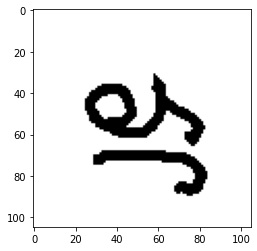

In [85]:
plt_t(omniglot[np.random.choice(len(omniglot))][0])

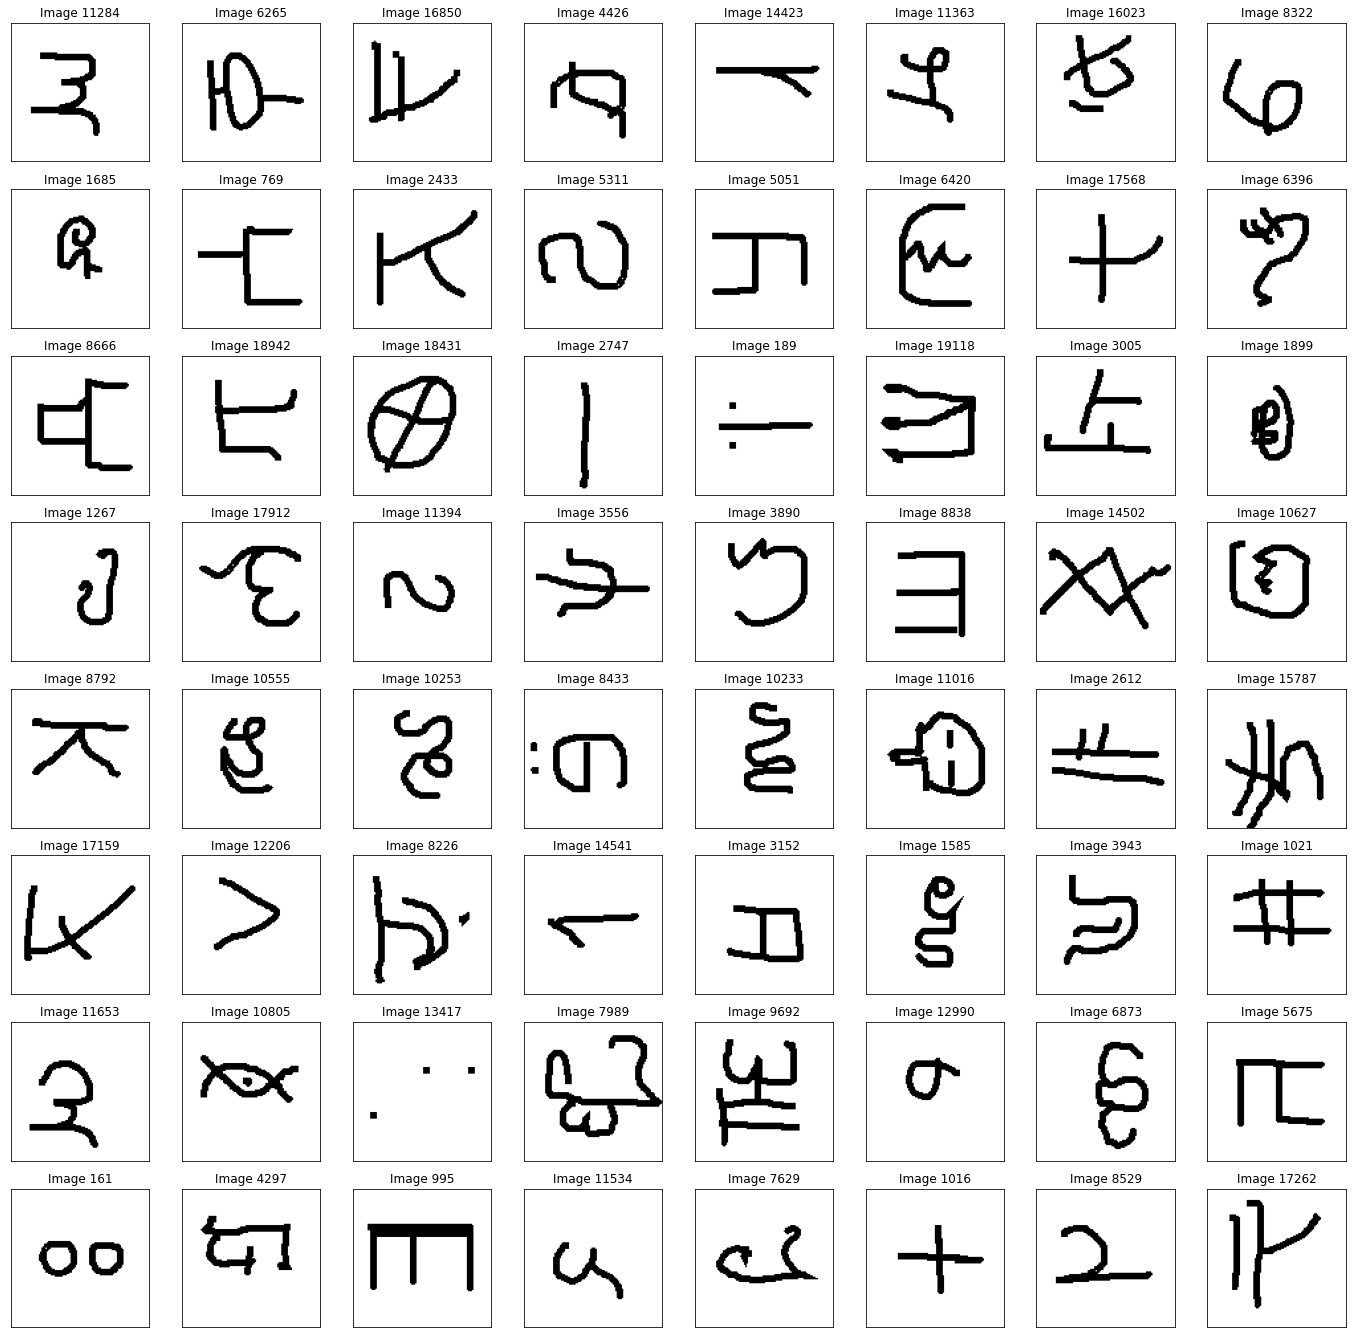

In [86]:
num = 8
plot_scale = 3

fig, axs = plt.subplots(num, num, figsize=(plot_scale*num, plot_scale*num))

for x in range(num):
    for y in range(num):
        
        index = np.random.choice(len(omniglot))
        img, label = omniglot[index]
        
        axs[x,y].imshow(torch.swapaxes(img, 0, 2))
        axs[x,y].set_title('Image ' + str(index))
        axs[x, y].xaxis.set_major_locator(ticker.NullLocator())
        axs[x, y].yaxis.set_major_locator(ticker.NullLocator())
        
plt.show()

torch.Size([3, 105, 105])
torch.Size([3, 105, 105])
torch.Size([3, 105, 105])
torch.Size([3, 105, 105])
torch.Size([3, 105, 105])


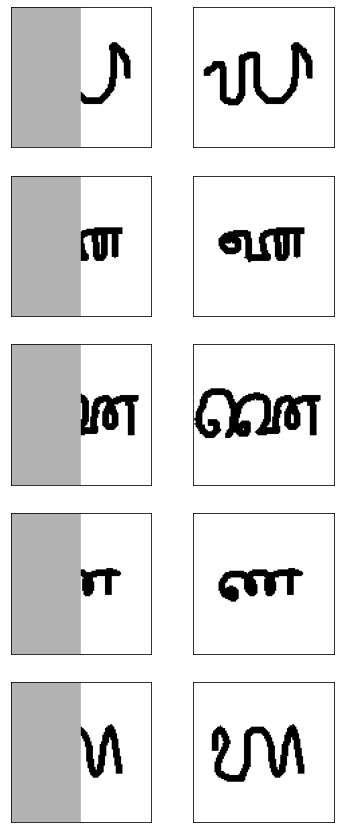

In [87]:

import matplotlib.ticker as ticker

num_characters = 5
num_comparisons = 2
plot_scale = 3

img_indices = [10173, 1678, 2327, 1802, 10230]
mnist_indices = [8752, 15294, 46824, 35439, 6054]

np.random.seed(42)

fig, axs = plt.subplots(num_characters, num_comparisons, figsize=(plot_scale * num_comparisons, plot_scale * num_characters))

for c in range(num_characters):
    index = img_indices[c]
    # index = np.random.choice(len(omniglot))
    
    img, label = omniglot[index]
    print(img.shape)
    
    alt_img = torch.clone(img)
    alt_img[:, :, :img.shape[1]//2] = 0.7
    
    axs[c, 0].imshow(torch.swapaxes(torch.swapaxes(alt_img, 0, 2), 0, 1))
    #axs[c, 0].set_title('Corrupted Character')
    
    axs[c, 1].imshow(torch.swapaxes(torch.swapaxes(img, 0, 2), 0, 1))
    #axs[c, 1].set_title('Original Character')
    
    for comp in range(num_comparisons):
        axs[c, comp].xaxis.set_major_locator(ticker.NullLocator())
        axs[c, comp].yaxis.set_major_locator(ticker.NullLocator())
plt.show()



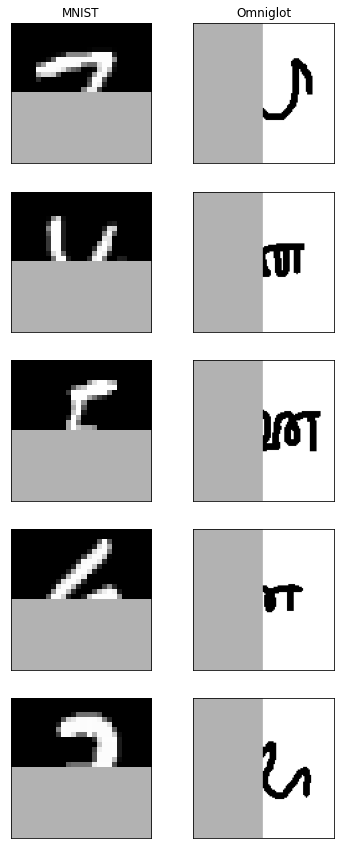

In [93]:

import matplotlib.ticker as ticker

num_characters = 5
num_comparisons = 2
plot_scale = 3

img_indices = [10173, 1678, 2327, 1802, 10178]
mnist_indices = [21323, 15294, 46824, 35439, 6055]

np.random.seed(42)

fig, axs = plt.subplots(num_characters, num_comparisons, figsize=(plot_scale * num_comparisons, plot_scale * num_characters))

for c in range(num_characters):
    img, label = omniglot[img_indices[c]]
    img[:, :, :img.shape[1]//2] = 0.7
    axs[c, 1].imshow(torch.swapaxes(torch.swapaxes(img, 0, 2), 0, 1))
    if c == 0:
        axs[c, 1].set_title('Omniglot')
    
    mn, label = mnist[mnist_indices[c]]
    mn[:, mn.shape[1]//2:, :] = 0.7
    axs[c, 0].imshow(torch.swapaxes(torch.swapaxes(mn, 2, 0), 0, 1))
    if c == 0:
        axs[c, 0].set_title('MNIST')
    
    for comp in range(num_comparisons):
        axs[c, comp].xaxis.set_major_locator(ticker.NullLocator())
        axs[c, comp].yaxis.set_major_locator(ticker.NullLocator())
plt.show()



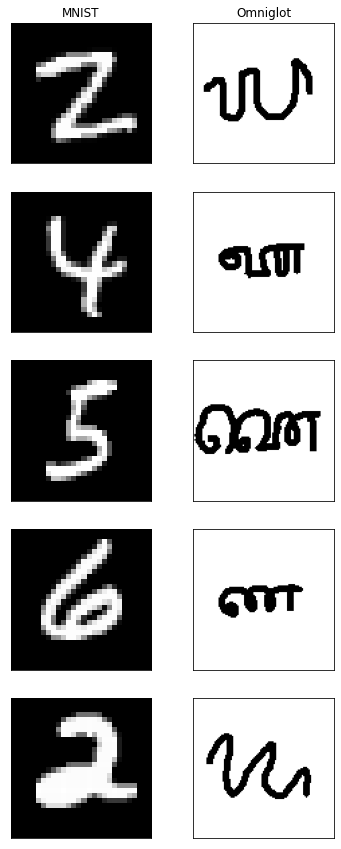

In [89]:

import matplotlib.ticker as ticker

num_characters = 5
num_comparisons = 2
plot_scale = 3

img_indices = [10173, 1678, 2327, 1802, 10178]
mnist_indices = [21323, 15294, 46824, 35439, 6055]

np.random.seed(42)

fig, axs = plt.subplots(num_characters, num_comparisons, figsize=(plot_scale * num_comparisons, plot_scale * num_characters))

for c in range(num_characters):
    img, label = omniglot[img_indices[c]]
    axs[c, 1].imshow(torch.swapaxes(torch.swapaxes(img, 0, 2), 0, 1))
    if c == 0:
        axs[c, 1].set_title('Omniglot')
    
    mn, label = mnist[mnist_indices[c]]
    axs[c, 0].imshow(torch.swapaxes(torch.swapaxes(mn, 2, 0), 0, 1))
    if c == 0:
        axs[c, 0].set_title('MNIST')
    
    for comp in range(num_comparisons):
        axs[c, comp].xaxis.set_major_locator(ticker.NullLocator())
        axs[c, comp].yaxis.set_major_locator(ticker.NullLocator())
plt.show()

